In [1]:
import numpy as np
from algo_DSPYS import signal_quality_assessment_v3, calc_hr
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import hilbert, savgol_filter
from utils import *
from statsmodels.tsa.stattools import acf

In [17]:
train_data = np.load('Cage_cat_dec24_dec31.npy')

In [18]:
train_data.shape

(59706, 1001)

In [19]:
X_train = train_data[:, :1000]

In [6]:
X_train_2 = X_train[0,:].reshape(1,-1)
# lab = labels[0,:].reshape(-1,1)
# times = train_data[0,-1].reshape(-1,1)

In [7]:
ids = []

In [8]:
for i in range(X_train.shape[0]):
    x = X_train[i,:]
    res = signal_quality_assessment_v3(x=x, Fs=100, n_lag=len(x) // 2, 
                                       low = 0.7, high = 35, 
                                       denoised_method = 'bandpass',
                                       show=False)
    if res[0]:
        X_train_2 = np.concatenate((X_train_2,X_train[i,:].reshape(1,-1)), axis =0)
        # lab = np.concatenate((lab,labels[i,:].reshape(-1,1)),axis=0)
        # times = np.concatenate((times,train_data[i,-1].reshape(-1,1)),axis=0)
        ids.append(i)

In [9]:
X_train_2 = X_train_2[1:,:]
# lab = lab[1:,:]
# times = times[1:,:]

In [10]:
X_train_2.shape

(127, 1000)

In [11]:
X_train = np.copy(X_train_2)

In [12]:
a = X_train[15,:]

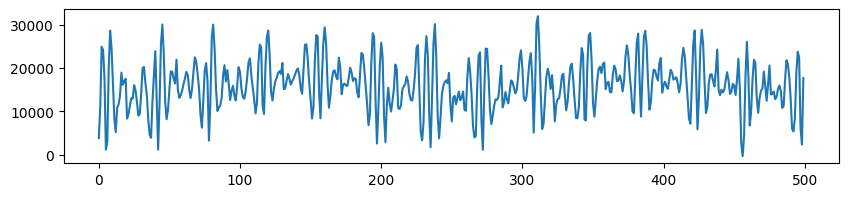

In [13]:
plt.figure(figsize=(10,2))
plt.plot(a[:500])

In [27]:
j = 1558

In [30]:
j = 0

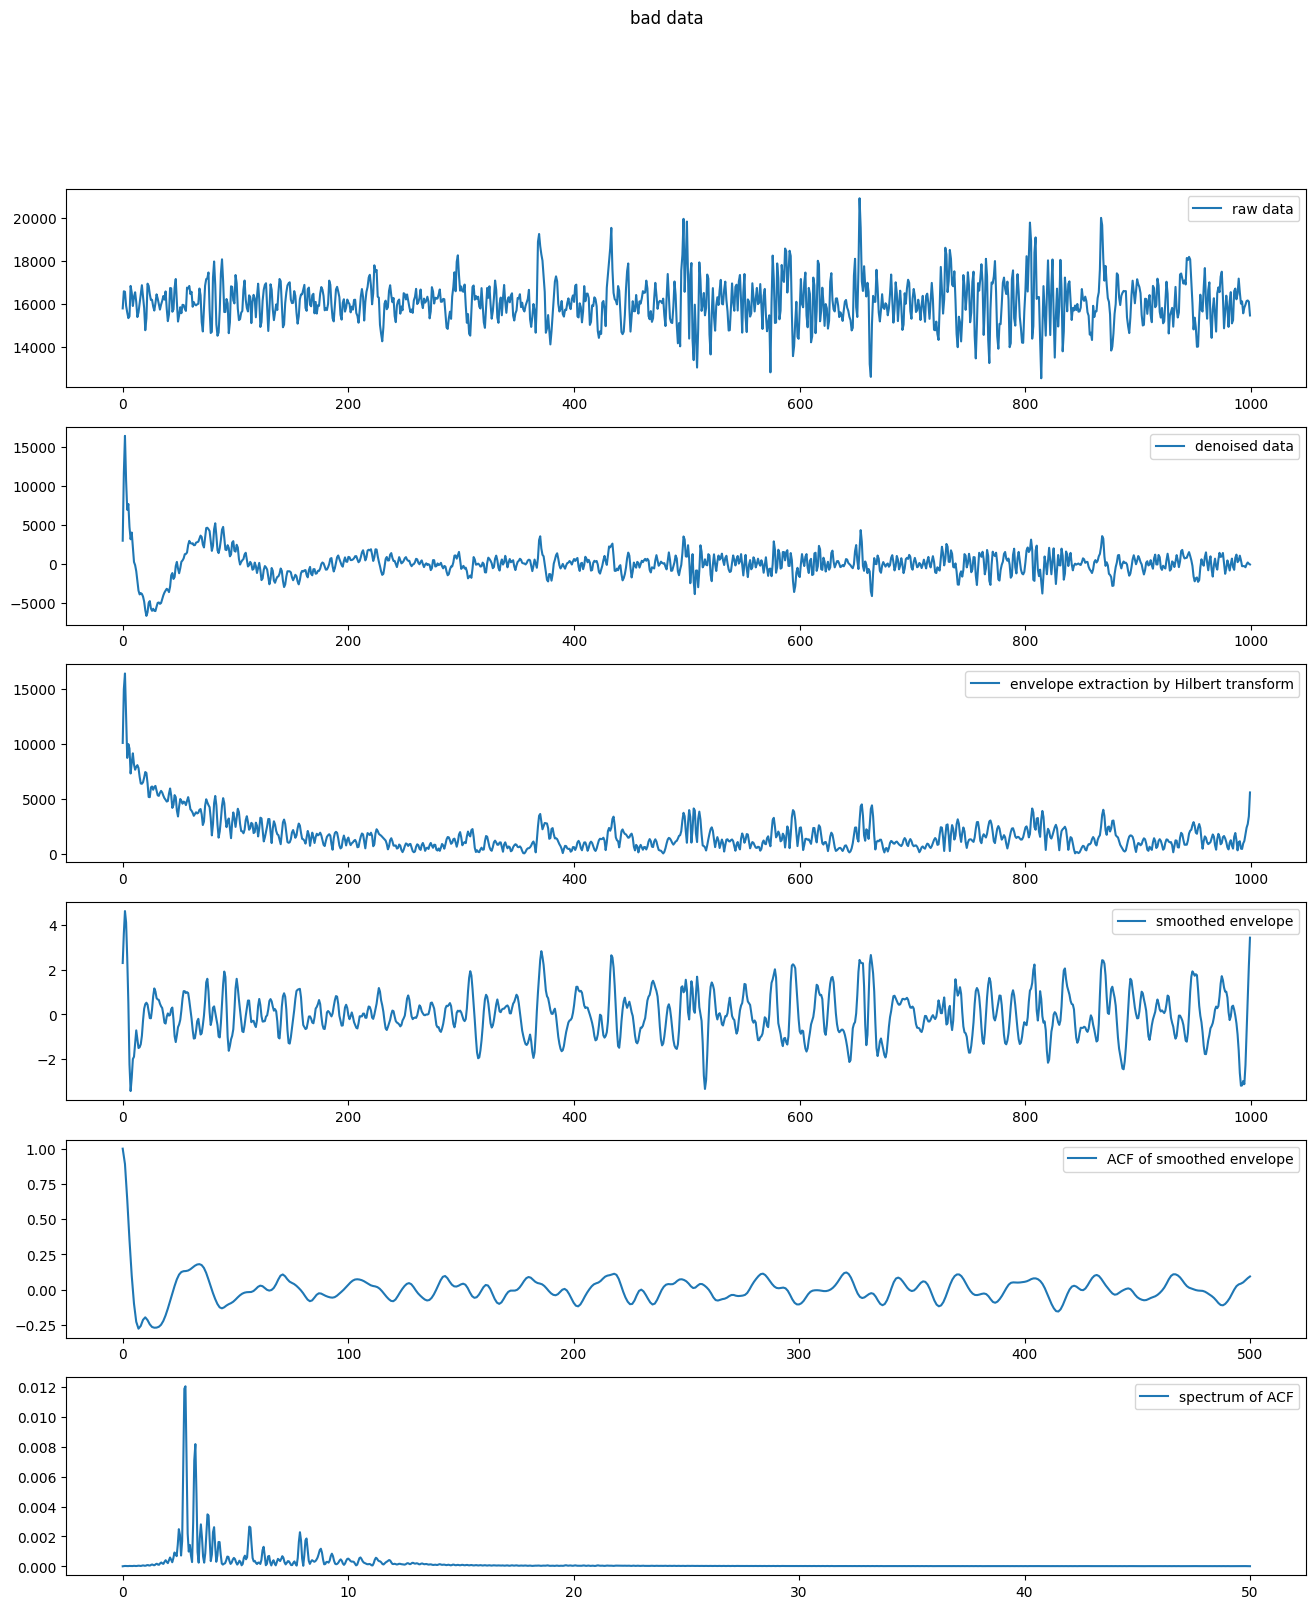

In [33]:
a = X_train[j,:]
# i+=1
res = signal_quality_assessment_v3(x=a, Fs=100, n_lag=1000 // 2, 
                                        low = 0.7, high = 35, 
                                        denoised_method = 'bandpass',
                                        show=True)
j+=1

In [21]:
res

[False,
 0.010065407426113605,
 3.857421875,
 0.09850609764357346,
 array([ 1.00000000e+00,  9.50019820e-01,  8.14700061e-01,  6.26502961e-01,
         4.18946168e-01,  2.16248297e-01,  2.98043442e-02, -1.39971881e-01,
        -2.97597909e-01, -4.46574439e-01, -5.84536461e-01, -6.99530491e-01,
        -7.73445111e-01, -7.93266033e-01, -7.57823170e-01, -6.76890827e-01,
        -5.65147163e-01, -4.34858883e-01, -2.92346481e-01, -1.39691050e-01,
         2.12854815e-02,  1.85721347e-01,  3.44160898e-01,  4.84026402e-01,
         5.92741131e-01,  6.60431339e-01,  6.82558572e-01,  6.61490196e-01,
         6.03823062e-01,  5.16977902e-01,  4.07866175e-01,  2.82825648e-01,
         1.48227875e-01,  1.12012513e-02, -1.21282689e-01, -2.43985885e-01,
        -3.53452815e-01, -4.46742433e-01, -5.20836145e-01, -5.71559158e-01,
        -5.93307120e-01, -5.80734040e-01, -5.31136632e-01, -4.46048982e-01,
        -3.32295706e-01, -2.01040911e-01, -6.40519996e-02,  7.00946159e-02,
         1.96682913e-

In [ ]:
Fs = 100

In [ ]:
# index = 0
# window_size = int(Fs)
# z= hilbert(a) 
# # z = x 
# envelope = np.abs(z)

# sg_win_len = round(0.27 * Fs)
# if sg_win_len%2 == 0:
#     sg_win_len -= 1
# smoothed_envelope = savgol_filter(envelope, sg_win_len, 3, mode='nearest')
# smoothed_envelope = (smoothed_envelope - np.mean(smoothed_envelope))/np.std(smoothed_envelope)

# sg_win_len = round(2.01 * Fs)
# if sg_win_len%2 == 0:
#     sg_win_len -= 1
# trend = savgol_filter(smoothed_envelope, sg_win_len, 6, mode='nearest')
# # smoothed_envelope = smoothed_envelope - trend
# smoothed_envelope = (smoothed_envelope - np.mean(smoothed_envelope))/np.std(smoothed_envelope)
# acf_x = acf(smoothed_envelope, nlags=500)
# acf_x = acf_x / acf_x[0]

In [ ]:
# plt.figure(figsize=(18,2))
# plt.plot(acf_x)

In [ ]:
# peak_ids, _ = signal.find_peaks(acf_x)

In [ ]:
# peak_ids

In [ ]:
acf_x = res[-1]
peak_ids, _ = signal.find_peaks(acf_x) #height = np.mean(acf_x)
time_diff = peak_ids[1:] - peak_ids[:-1]
time_diff

In [ ]:
peak_ids

In [ ]:
# peak_ids, _ = signal.find_peaks(acf_x, height = np.mean(acf_x))

In [ ]:
fs =100

In [ ]:
cadidates = []
for peak_id in peak_ids:
            if (peak_id > int(0.25 * fs) and peak_id < int(0.8 * fs)):
                cadidates.append(peak_id)
        
            if len(cadidates) == 0:
                median_hr = np.median(time_diff)
            else:
                # median_hr = cadidates[np.argmax(acf_x[cadidates])] #+ int(0.5 * Fs)   
                median_hr = cadidates[0] 

In [ ]:
frequency = 1/(median_hr/fs)

In [ ]:
frequency

In [ ]:
round(frequency * 60) 

In [ ]:
Y_train[5]

In [ ]:
hr = []
label_ac = []

In [ ]:
# print('===============================')
# print('bandpass filter......')
# cnt = 0
# for i in range(X_train.shape[0]):
#     X_train[i, :] = filter_data(X_train[i, :], Fs, 0.7, 35, 5)

In [ ]:
X_train_3 = X_train[0,:].reshape(1,-1)

In [ ]:
for i in range(X_train.shape[0]):
    hr_1, _ = calc_hr(X_train[i,:])
    if hr_1!=-1:
        hr.append(hr_1)
        label_ac.append(Y_train[i,:])
        X_train_3 = np.concatenate((X_train_3,X_train[i,:].reshape(1,-1)),axis=0)

In [ ]:
X_train_3 = X_train_3[1:,:]

In [ ]:
# hr[80:90]

In [ ]:
plt.plot(hr)
plt.ylabel('Heart Rate')
plt.xlabel('Sample')
plt.title('Predictions')

In [ ]:
hr = np.array(hr).reshape(-1,1)
lab_ac = np.array(label_ac).reshape(-1,1)

In [ ]:
# v = int(lab.shape[0])

In [ ]:
hr.shape

In [ ]:
# hr = hr[:v,:]

In [ ]:
plot_2vectors(lab_ac, hr, name='Prediction Results')

In [ ]:
ids_2 = []

In [ ]:
my_hr = []
my_lab = []

In [ ]:
for i in range(hr.shape[0]):
    diff = hr[i,0] - lab[i]
    if 20 < abs(diff) < 25:
        ids_2.append(i)
    if abs(diff)<25:
        my_hr.append(hr[i])
        my_lab.append(lab[i])


In [ ]:
my_hr = np.array(my_hr)
my_lab = np.array(my_lab)

In [ ]:
plot_2vectors(my_lab, my_hr, name='Prediction Results')

In [ ]:
# ids_2 = []

In [ ]:
# for i in range(my_hr.shape[0]):
#     diff = my_hr[i,0] - my_lab[i]
#     if abs(diff)> 20:
#         ids_2.append(i)

In [ ]:
len(ids_2)

In [ ]:
j = 0

In [ ]:
# print('id:', ids_2[j])
# print('pred:', hr[ids_2[j]])
# print('label', lab[ids_2[j]])
# # j+=1

In [ ]:
times[138,0]

In [ ]:
a = X_train_3[2,:]
res = signal_quality_assessment_v3(x=a, Fs=100, n_lag=1000 // 2, 
                                        low = 0.7, high = 35, 
                                        denoised_method = 'bandpass',
                                        show=True)

In [ ]:
acf_x = res[-1]
peak_ids, _ = signal.find_peaks(acf_x, height = np.mean(acf_x)) #height = np.mean(acf_x)

In [ ]:
peak_ids

In [ ]:
time_diff = peak_ids[1:] - peak_ids[:-1]
np.median(time_diff)

In [ ]:
hrr = 1/(peak_ids[0]/fs)*60
hrr

In [ ]:
my_lab[1]